## Nested cross-validation
- Inner loop: parameter optimization
- Outer loop: k-fold CV to calculate test accuracy

https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html

In [4]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

print(__doc__)

Automatically created module for IPython interactive environment


In [5]:
# Number of random trials
NUM_TRIALS = 30

# Load the dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target


In [6]:
# Set up possible values of parameters to optimize over
p_grid = {"C": [1, 10, 100],
          "gamma": [.01, .1]}

In [8]:
# We will use a Support Vector Classifier with "rbf" kernel
svm = SVC(kernel="rbf")

In [9]:
# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

In [10]:
# Loop for each trial
for i in range(NUM_TRIALS):

    print('ITER: ' + str(i))
    
    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    clf.fit(X_iris, y_iris)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv)
    nested_scores[i] = nested_score.mean()


ITER: 0
ITER: 1
ITER: 2
ITER: 3
ITER: 4
ITER: 5
ITER: 6
ITER: 7
ITER: 8
ITER: 9
ITER: 10
ITER: 11
ITER: 12
ITER: 13
ITER: 14
ITER: 15
ITER: 16
ITER: 17
ITER: 18
ITER: 19
ITER: 20
ITER: 21
ITER: 22
ITER: 23
ITER: 24
ITER: 25
ITER: 26
ITER: 27
ITER: 28
ITER: 29


In [11]:
score_difference = non_nested_scores - nested_scores

print("Average difference of {:6f} with std. dev. of {:6f}."
      .format(score_difference.mean(), score_difference.std()))


Average difference of 0.007581 with std. dev. of 0.007833.


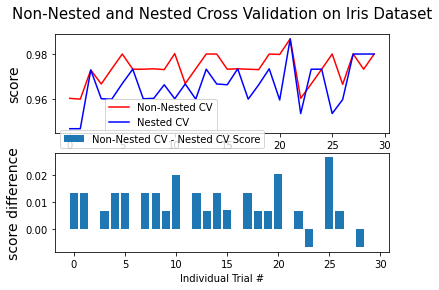

In [12]:
# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on Iris Dataset",
          x=.5, y=1.1, fontsize="15")

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()